 1.Install Necessary Libraries

In [1]:
!pip install deepface opencv-python


 2.Import Libraries

In [5]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt


3.  Load Video and Process Frames

In [9]:


# Path to the video file
video_path = '"C:\Users\RISHENDRA\OneDrive\Desktop\testt.mp4'  # Replace with your video path

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Analyze the frame for emotions
    try:
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        dominant_emotion = result[0]['dominant_emotion']
        face_area = result[0]['region']  # get face coordinates

        # Draw rectangle around the face
        x, y, w, h = face_area['x'], face_area['y'], face_area['w'], face_area['h']
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the resulting frame with emotion
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, dominant_emotion, (x, y - 10), font, 0.9, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('Video', frame)
    except Exception as e:
        print("Error in analyzing frame: ", e)

    # Press Q on keyboard to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# When everything done, release the video capture object
cap.release()
cv2.destroyAllWindows()


4. Save the Processed Video

In [10]:
# Path to the video file
video_path = r'C:\Users\RISHENDRA\OneDrive\Desktop\testt.mp4' 
output_path = r'C:\Users\RISHENDRA\OneDrive\Desktop\out.mp4'  # Replace with your desired output path

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the video writer initialized to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Analyze the frame for emotions
    try:
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        dominant_emotion = result[0]['dominant_emotion']
        face_area = result[0]['region']  # get face coordinates

        # Draw rectangle around the face
        x, y, w, h = face_area['x'], face_area['y'], face_area['w'], face_area['h']
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the resulting frame with emotion
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, dominant_emotion, (x, y - 10), font, 0.9, (0, 255, 0), 2, cv2.LINE_AA)
        out.write(frame)
    except Exception as e:
        print("Error in analyzing frame: ", e)

    # Press Q on keyboard to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# When everything done, release the video capture object and video writer object
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
5.Display a Frame with Detected Emotions

[{'emotion': {'angry': 0.004063867405720534, 'disgust': 1.6642408929826188e-09, 'fear': 7.41149156758139, 'happy': 1.0041157382199608, 'sad': 13.088942354258439, 'surprise': 0.0009393273663224666, 'neutral': 78.4904467159776}, 'dominant_emotion': 'neutral', 'region': {'x': 295, 'y': 219, 'w': 69, 'h': 69, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.99}, {'emotion': {'angry': 9.927725466558293e-11, 'disgust': 1.8477834263304178e-14, 'fear': 1.0944230174962802e-06, 'happy': 99.9718070013408, 'sad': 6.024905378442962e-07, 'surprise': 7.217322352511872e-05, 'neutral': 0.028119750134333977}, 'dominant_emotion': 'happy', 'region': {'x': 228, 'y': 73, 'w': 164, 'h': 164, 'left_eye': (340, 138), 'right_eye': (279, 138)}, 'face_confidence': 0.92}]


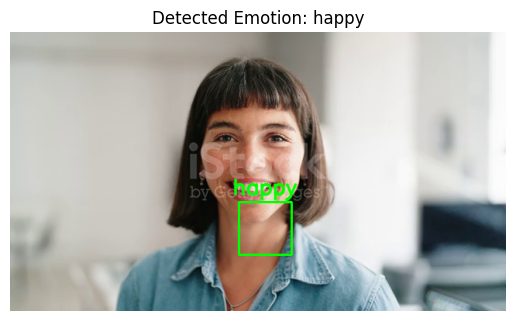

In [18]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# Path to the video file
video_path = r'C:\Users\RISHENDRA\OneDrive\Desktop\testt.mp4'  # Replace with your video path

# Open the video file
cap = cv2.VideoCapture(video_path)

# Capture a single frame
ret, frame = cap.read()
if ret:
    # Analyze the frame for emotions
    try:
        # Analyze the frame using DeepFace
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

        # Print the result structure for debugging
        print(result)

        # Check if there are any detected faces
        if result:
           
            face_area = result[0]['region']  # get face coordinates

            # Center the rectangle around the face
            x, y, w, h = face_area['x'], face_area['y'], face_area['w'], face_area['h']
            x_center = x + w // 2
            y_center = y + h // 2
            half_w = w // 2
            half_h = h // 2

            cv2.rectangle(frame, (x_center - half_w, y_center - half_h), (x_center + half_w, y_center + half_h), (0, 255, 0), 2)

            # Display the resulting frame with emotion
            font = cv2.FONT_HERSHEY_SIMPLEX
            text_size = cv2.getTextSize(dominant_emotion, font, 0.9, 2)[0]
            text_x = x_center - text_size[0] // 2
            text_y = y_center - half_h - 10
            cv2.putText(frame, dominant_emotion, (text_x, text_y), font, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

            # Convert frame to RGB for displaying with matplotlib
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.imshow(frame_rgb)
            plt.title(f"Detected Emotion: {dominant_emotion}")
            plt.axis('off')
            plt.show()
        else:
            print("No faces detected in the frame.")
    except Exception as e:
        print("Error in analyzing frame: ", e)

# Release the video capture object
cap.release()
